In [3]:
mean = [0, 0]
covariance = [[1, 0], [0, 1]]

b)

In [4]:
import numpy as np

size_list= [10,30,50,100,200,300,400]
M1 = np.array([[2, 1], [10, 2.5]])
M2 = np.array([[8, 9], [7.5, 3]])

_, Sm1, _ = np.linalg.svd(M1, full_matrices=True)
_, Sm2, _ = np.linalg.svd(M2, full_matrices=True)

print(f"M1: {Sm1}  M2:{Sm2} \n*******************")


for s in size_list:
   # Generate the matrix
   matrix = np.random.multivariate_normal(mean, covariance, size=s).T
   y1 = M1 @ matrix
   y2 = M2 @ matrix
   U2, S2, Vh2 = np.linalg.svd(y2, full_matrices=True)
   U1, S1, Vh1 = np.linalg.svd(y1, full_matrices=False)

   print(f"size:{s}  y1: {S1}  y2:{S2}")



M1: [10.53683184  0.47452594]  M2:[14.17137065  3.069569  ] 
*******************
size:10  y1: [33.62871621  1.25102458]  y2:[43.57400184  8.39978047]
size:30  y1: [65.22283088  2.18709699]  y2:[91.33642122 13.58760615]
size:50  y1: [67.96354888  2.99081275]  y2:[91.21776686 19.38675349]
size:100  y1: [119.52773497   4.92719514]  y2:[156.86587916  32.6632366 ]
size:200  y1: [154.12910255   6.41117351]  y2:[200.97685805  42.77552816]
size:300  y1: [187.42909635   8.26533574]  y2:[253.90374261  53.08204681]
size:400  y1: [214.53021698   8.75070964]  y2:[289.51105337  56.4138642 ]


In [5]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive')

Mounted at /content/drive


Y1

In [6]:
path_y1 = "/content/drive/My Drive/Y1.csv"
y1_csv = pd.read_csv(path_y1)
y1_csv.head()

,x,y
0,-2.804027,-3.421110
1,-11.651829,-10.800409
2,12.548424,14.185517
3,-3.548643,-5.936388
4,2.102467,2.818875


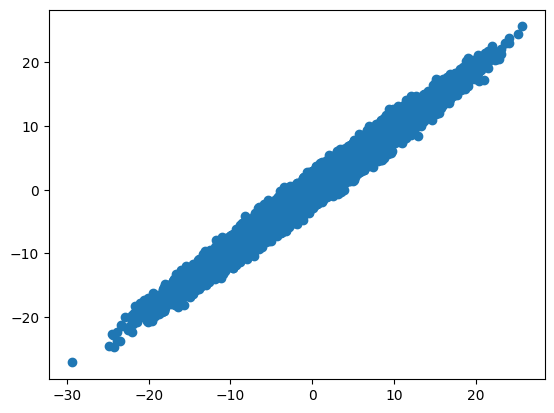

In [7]:
plt.scatter(y1_csv['y'], y1_csv['x'])
plt.show()

In [8]:
y1 = y1_csv.to_numpy()
y1

array([[ -2.80402712,  -3.42111029],
       [-11.65182877, -10.80040936],
       [ 12.54842383,  14.18551658],
       ...,
       [ -2.65130279,  -2.83510865],
       [  1.58271951,   2.24060575],
       [  7.71973936,   8.98853346]])

Y2

In [9]:
path_y2 = "/content/drive/My Drive/Y2.csv"
y2_csv = pd.read_csv(path_y2)
y2_csv

,x,y
0,-5.889443,-1.598657
1,-7.394732,-0.381036
2,20.733888,5.092741
3,-15.487370,-4.968974
4,5.684508,1.663826
...,...,...
49995,-10.305297,-2.259275
49996,-6.190140,-2.088472
49997,-3.570332,-0.778861
49998,4.872151,1.469911


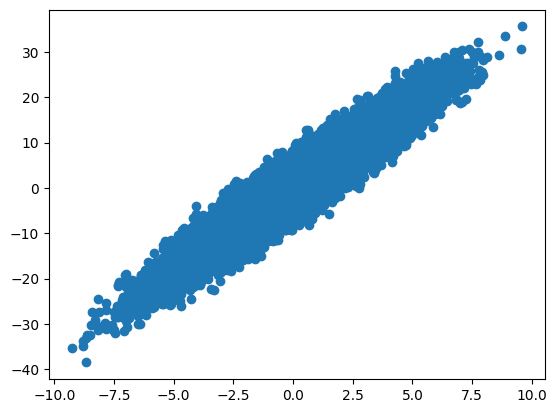

In [10]:
plt.scatter(y2_csv['y'], y2_csv['x'])
plt.show()

In [11]:
y2 = y2_csv.to_numpy()
y2

array([[-5.88944295, -1.59865699],
       [-7.39473171, -0.38103587],
       [20.73388759,  5.09274068],
       ...,
       [-3.57033208, -0.77886121],
       [ 4.8721507 ,  1.46991135],
       [14.06370984,  3.61274574]])

a)

In [12]:
Y1_C = np.cov(y1.T)
Y2_C = np.cov(y2.T)

In [13]:
U1_C, S1_C, V1_C = np.linalg.svd(Y1_C)
U2_C, S2_C, V2_C = np.linalg.svd(Y2_C)

In [14]:
print(S1_C)
print(S2_C)

[77.01352004  0.46545393]
[76.63418839  0.46775788]


In [15]:
Um = U1_C
Sm = np.sqrt(np.diag(S1_C))
Vm = U2_C

M = Um @ Sm @ Vm.T
M

array([[6.01864836, 1.00359787],
       [6.02101203, 1.99876244]])

In [16]:
MT = M.T
MT

array([[6.01864836, 6.02101203],
       [1.00359787, 1.99876244]])

In [17]:
X = np.random.multivariate_normal(mean, covariance, size=50000).T
X.shape

(2, 50000)

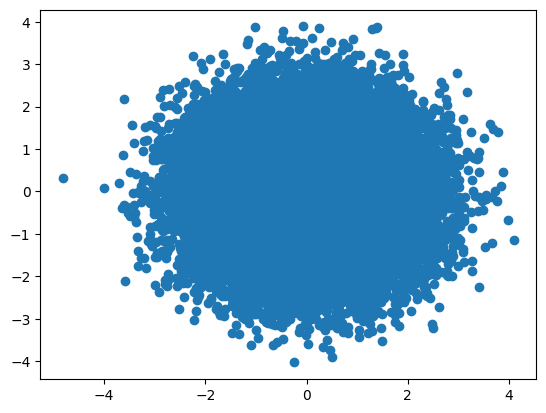

In [18]:
plt.scatter(X[0],X[1])
plt.show()

In [19]:
y1_ = M @ X
y2_ = MT @ X

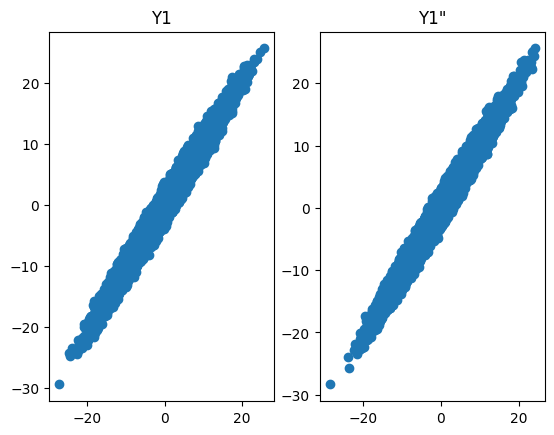

In [20]:
plt.subplot(1, 2, 1)
plt.title('Y1')
plt.scatter(y1.T[0], y1.T[1])
plt.subplot(1, 2, 2)
plt.title('Y1"')
plt.scatter(y1_[0],y1_[1])
plt.show()

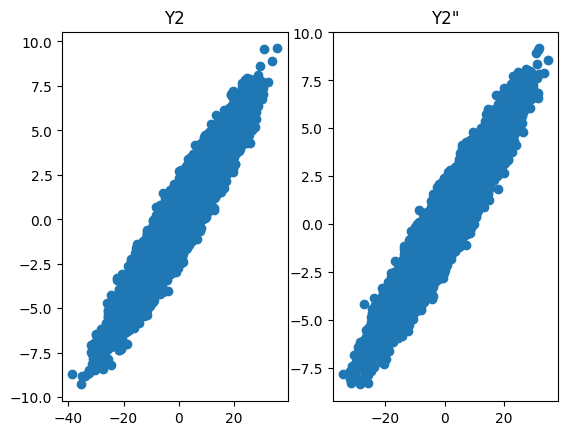

In [21]:
plt.subplot(1, 2, 1)
plt.title('Y2')
plt.scatter(y2.T[0], y2.T[1])
plt.subplot(1, 2, 2)
plt.title('Y2"')
plt.scatter(y2_[0],y2_[1])
plt.show()